In [5]:
import numpy as np
import json
import os
from PIL import Image
import matplotlib.pyplot as plt
import math

from utils_data import *
import numpy as np

root_folder = './images/'
json_file = './images/gt.json'

# Load all the images and GT
train_imgs, train_class_labels, train_color_labels, test_imgs, test_class_labels, \
    test_color_labels = read_dataset(root_folder=root_folder, gt_json=json_file)

# List with all the existent classes
classes = list(set(list(train_class_labels) + list(test_class_labels)))

# Load extended ground truth
imgs, class_labels, color_labels, upper, lower, background = read_extended_dataset()
cropped_images = crop_images(imgs, upper, lower)

(180, 80, 60, 3)
(180,)


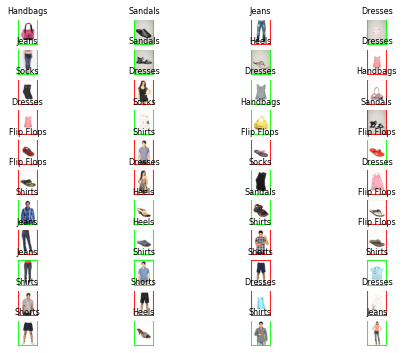

In [17]:
# Prova

# using the function visualize_retrieval for the visualization of the retrieval results. Pass the class labels as information to be displayed
predicted = np.random.choice([True, False], len(cropped_images))
print(imgs.shape)
print(cropped_images.shape)
visualize_retrieval(imgs, topN=44, info=class_labels, ok=predicted)

## 4.1: Funcions d’anàlisi qualitatiu

### Retrieval_by_color (Aleix)

In [ ]:
# Code

### Retrieval_by_shape (Jan)

In [ ]:
# Code

### Retrieval_combined (Aleix)

In [ ]:
# Code

## Funcions d’anàlisi quantitatiu

### Kmean_statistics

Funció que rep com a entrada la classe Kmeans amb un conjunt d’imatges i un valor, Kmax, que representa la màxima K que volem analitzar. Per cada valor des de K=2 fins a K=Kmax executarà la funció fit i calcularà la WCD, el nombre d’iteracions i el temps que ha necessitat per convergir, etc. Finalment, farà una visualització amb aquestes dades.

In [76]:
def print_simple_plot(metric):
    fig, ax = plt.subplots(1, 1, tight_layout=False)
    
    # Loss
    ax.plot(range(2,2+len(metric)), metric, label='wcd')
    ax.set_title('Within class distance per K')
    ax.set_xlabel('K')
    ax.set_ylabel('Within class distance')
    ax.legend()
    

    
    plt.tight_layout()
    
    plt.show()

In [66]:
from Kmeans import KMeans

def Kmean_statistics(kmeans, imgs, kmax):
    bestK = 2
    wcd = []
    best_not_found = False
    for i in range(2, kmax+1):
        kmeans.K = i
        kmeans.fit()
        wcd.append(kmeans.withinClassDistance())

        if len(wcd) > 1:
            dec = 100-100*(wcd[-1]/wcd[-2])
            if dec < 20 and best_not_found:
                bestK = i-1
    
    return wcd

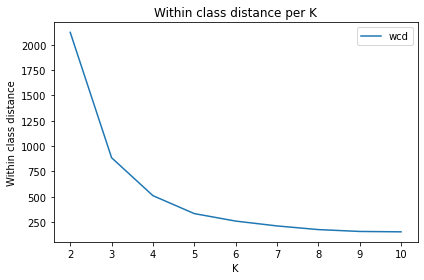

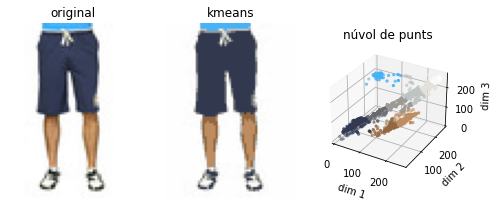

In [77]:
import pickle
import matplotlib

np.random.seed(123)
with open('/home/jmoran/Documents/_Docs_/UNI/Any3_2nQ/IA/Pràctiques/PLAB_2/Practica2_IA/Etiquetador/test/test_cases_kmeans.pkl', 'rb') as f:
    test_cases = pickle.load(f)


for ix, input in enumerate(test_cases['input']):
    
    km = KMeans(input, test_cases['K'][ix])
    wcd = Kmean_statistics(km, None ,10)
    print_simple_plot(wcd)
    km.fit()
    visualize_k_means(km, input.shape)
    break



### Get_shape_accuracy (Aleix)

In [ ]:
# Code 

### Get_color_accuracy (Jan)

In [ ]:
# Code

## Millores als mètodes de classificació

### Inicializations de Kmeans

In [ ]:
# Code

### Diferents heurístiques per BestK

In [ ]:
# Code

### Find_BestK

In [ ]:
# Code

### Features for KNN

In [ ]:
# Code